In [1]:
# Провести дисперсионный анализ для определения того, есть ли различия среднего роста среди взрослых футболистов, хоккеистов и штангистов. 
# Даны значения роста в трех группах случайно выбранных спортсменов: 
# Футболисты: 173, 175, 180, 178, 177, 185, 183, 182. 
# Хоккеисты: 177, 179, 180, 188, 177, 172, 171, 184, 180. 
# Штангисты: 172, 173, 169, 177, 166, 180, 178, 177, 172, 166, 170. 
# Данная промежуточная аттестация оценивается по системе "зачет" / "не зачет". "Зачет" ставится, 
# если Слушатель успешно выполнил задание. "Незачет" ставится, если Слушатель не выполнил задание. 
# Критерии оценивания: 1 - Слушатель провел дисперсионный анализ для определения того, 
# есть ли различия среднего роста среди взрослых футболистов, хоккеистов и штангистов.

In [2]:
import numpy as np
from scipy import stats
f = ([173, 175, 180, 178, 177, 185, 183, 182])
h = ([177, 179, 180, 188, 177, 172, 171, 184, 180])
w = ([172, 173, 169, 177, 166, 180, 178, 177, 172, 166, 170])
stats.shapiro(f) 

ShapiroResult(statistic=0.9775082468986511, pvalue=0.9495404362678528)

In [3]:
stats.shapiro(h) 

ShapiroResult(statistic=0.9579196572303772, pvalue=0.7763139009475708)

In [4]:
stats.shapiro(w) 

ShapiroResult(statistic=0.9386808276176453, pvalue=0.5051165223121643)

In [5]:
stats.bartlett(f, h, w)

BartlettResult(statistic=0.4640521043406442, pvalue=0.7929254656083131)

In [6]:
stats.f_oneway(f, h, w) #принимаем Н1, различия есть 

F_onewayResult(statistic=5.500053450812596, pvalue=0.010482206918698694)

In [7]:
stats.kruskal(f, h, w) # Выводим результаты теста Крускала-Уоллиса

KruskalResult(statistic=7.897493213863828, pvalue=0.01927885061595347)

In [8]:
print(stats.tukey_hsd(f, h, w)) #тест не срабатывает 

/lib/python3.11/site-packages/scipy/integrate/_quadpack_py.py:1233: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


<class 'ValueError'>: The function value at x=nan is NaN; solver cannot continue.

In [9]:
%pip install scikit-posthocs
from scikit_posthocs import posthoc_dunn
all_heights = np.concatenate([f,h,w])
group_labels = ['football_players'] * len(f) + ['hockey_players'] * len(h) + ['weightlifters'] * len(w)
print(posthoc_dunn([f, h, w], p_adjust='holm')) # Проводим тест Данна

          1         2         3
1  1.000000  0.733469  0.036060
2  0.733469  1.000000  0.051718
3  0.036060  0.051718  1.000000


In [10]:
# статистически значимые различия между группами футболистов и штангистов 

In [11]:
%pip install seaborn

<AxesSubplot:>

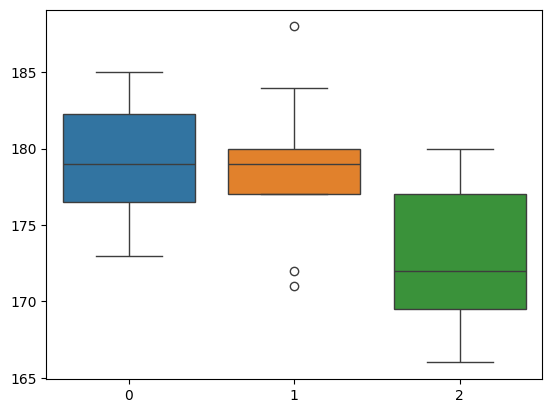

In [12]:
import seaborn as sns
sns.boxplot(data = [f,h,w])